In [1]:
# For compatibility with Python 2
from __future__ import print_function

import pandas as pd
import numpy as np

# To not to show warnings
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings('ignore', category=ConvergenceWarning)

# To load datasets
from sklearn import datasets

# To import the classifier (Neural Networks)
import sklearn.neural_network as NN

# To scale the data
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# To measure accuracy
from sklearn import metrics
from sklearn import model_selection

# To split data to train and test
from sklearn.model_selection import train_test_split

# To perform parameter search
from sklearn.model_selection import GridSearchCV

# To support plots
import matplotlib.pyplot as plt

# To display all the plots inline
%matplotlib inline

from sklearn.model_selection import GridSearchCV

In [2]:
# To increase quality of figures
plt.rcParams["figure.figsize"] = (10, 5)

In [3]:
# loading data
df1  = pd.read_excel("Dataset.xlsx")
df1 = df1.replace(to_replace='None', value=np.nan)
df1.isnull().sum()

x1     512
x2       0
x3       0
x4     515
x5       0
x6       0
x7       0
x8     134
x9       0
x10      0
x11      0
x12      0
x13      0
x14      0
x15      0
x16      0
x17      0
x18      0
x19      0
x20      0
x21      0
x22      0
y        0
dtype: int64

In [4]:
df1['y'].value_counts()

0    7580
Name: y, dtype: int64

In [5]:
a = df1['x1'].mode()
b = df1['x4'].mode()
c= df1['x8'].mode()
a,b,c

(0    0.0
 dtype: float64,
 0    1.0
 dtype: float64,
 0    0.0
 dtype: float64)

In [6]:
df1['x1'] = df1['x1'].replace(to_replace=np.nan, value=0)
df1['x4'] = df1['x4'].replace(to_replace=np.nan, value=1)
df1['x8'] = df1['x8'].replace(to_replace=np.nan, value=0)
#df['x1'].apply(lambda x: x.fillna(a, inplace=True))
# df1.isnull().sum()

In [7]:
# # loading data
df0  = pd.read_excel("Dataset.xlsx",sheet_name = 1)
df0 = df0.replace(to_replace='None', value=np.nan)
# df0.isnull().sum()  

In [8]:
a = df0['x1'].mode()
b = df0['x4'].mode()
c= df0['x8'].mode()
a,b,c

(0    0.0
 dtype: float64,
 0    4.0
 dtype: float64,
 0    0.0
 dtype: float64)

In [9]:
df0['x1'] = df0['x1'].replace(to_replace=np.nan, value=0)
df0['x4'] = df0['x4'].replace(to_replace=np.nan, value=4)
df0['x8'] = df0['x8'].replace(to_replace=np.nan, value=0)
#df['x1'].apply(lambda x: x.fillna(a, inplace=True))
# df1.isnull().sum()

In [10]:
df = df1.append(df0, ignore_index = True)
df.isnull().sum()  

x1     0
x2     0
x3     0
x4     0
x5     0
x6     0
x7     0
x8     0
x9     0
x10    0
x11    0
x12    0
x13    0
x14    0
x15    0
x16    0
x17    0
x18    0
x19    0
x20    0
x21    0
x22    0
y      0
dtype: int64

In [11]:
X = df.drop("y",axis = 1)
y = df["y"]

len(X),len(y)

(14299, 14299)

In [12]:
X.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22
count,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,...,14299.000000,1.429900e+04,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000
mean,0.737604,3.442129,0.842926,4.503672,2.282607,0.387090,0.729422,1.321561,1.504161,1.994895,...,126.920064,5.925321e+05,33.006574,5928.335758,383.361354,132.069655,2.018395,5.012370,10.030157,7.977387
std,1.442067,3.581933,1.149212,2.891890,1.145670,1.113519,0.444274,5.189334,1.123401,1.422366,...,41.367818,3.351653e+05,8.297321,31764.374618,1489.200039,38.280422,0.991153,0.994702,1.990353,1.613688
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,53.000000,4.325700e+04,3.000000,0.000000,0.000000,3.000000,-1.884801,1.450000,2.900000,2.360000
25%,0.000000,1.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,97.000000,3.640510e+05,28.000000,0.000000,0.000000,126.000000,1.348498,4.350000,8.690000,6.900000
50%,0.000000,3.000000,0.000000,4.000000,2.000000,0.000000,1.000000,0.000000,2.000000,2.000000,...,123.000000,5.555560e+05,31.000000,0.000000,0.000000,126.000000,2.011234,5.010000,10.040000,7.970000
75%,1.000000,4.000000,2.000000,6.000000,3.000000,0.000000,1.000000,0.000000,3.000000,3.000000,...,154.000000,7.386170e+05,41.000000,0.000000,0.000000,151.000000,2.700124,5.690000,11.370000,9.080000
max,7.000000,15.000000,6.000000,12.000000,5.000000,4.000000,1.000000,40.000000,3.000000,4.000000,...,283.000000,4.291793e+06,50.000000,314156.000000,12252.000000,311.000000,5.664434,8.900000,18.460000,13.820000


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=345)

In [14]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(n_estimators=100,learning_rate=1.1,algorithm='SAMME.R')


model.fit(X_train, y_train)
print('Train score:', model.score(X_train, y_train))
print('Test score:', model.score(X_test, y_test))

Train score: 0.8324217699273738
Test score: 0.8264462809917356


In [15]:
from sklearn import tree

model = AdaBoostClassifier()
model1 = GridSearchCV(estimator =model,
                         cv=7,
                         n_jobs=-1,
                         param_grid={
                            'learning_rate': [1,1.1,0.1,10],
                            'n_estimators': range(100, 110),
                            'algorithm':['SAMME','SAMME.R']
                        })
model1.fit(X_train, y_train)
print('Optimal parameters:', model1.best_params_)

Optimal parameters: {'algorithm': 'SAMME.R', 'learning_rate': 1, 'n_estimators': 106}


In [16]:
print('Train score:', model1.score(X_train, y_train))
print('Test score:', model1.score(X_test, y_test))
print('Full Data score:', model1.score(X, y))
y_test_predict = model1.predict(X_test)
y_predict = model1.predict(X)

Train score: 0.8328700797991572
Test score: 0.8270820089001907
Full Data score: 0.8315966151479124


In [17]:
from sklearn.metrics import balanced_accuracy_score
print('Balanced Accuracy Score Test data', balanced_accuracy_score(y_test,y_test_predict))      

Balanced Accuracy Score Test data 0.826394344069128


In [18]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
print('Confusion matrix')
df = pd.DataFrame({'y_Actual':y_test, 'y_Predicted':y_test_predict})
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrix)

Confusion matrix
Predicted     0     1
Actual               
0          1400   272
1           272  1202


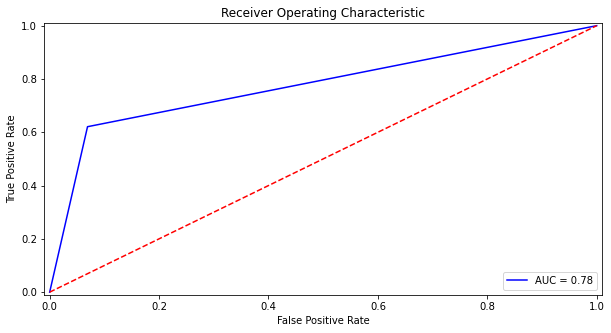

In [37]:
def plot_roc_curve(y_true, y_prob):
    # ROC curve code here is for 2 classes only
    if len(np.unique(y)) == 2: 
        fpr, tpr, threshold = metrics.roc_curve(y_true, y_prob)
        roc_auc = metrics.auc(fpr, tpr)
        plt.title('Receiver Operating Characteristic')
        plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
        plt.legend(loc='lower right')
        plt.plot([0, 1], [0, 1], 'r--')
        plt.xlim([-0.01, 1.01])
        plt.ylim([-0.01, 1.01])
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
        plt.show()
        
plot_roc_curve(y_test,y_test_predict)

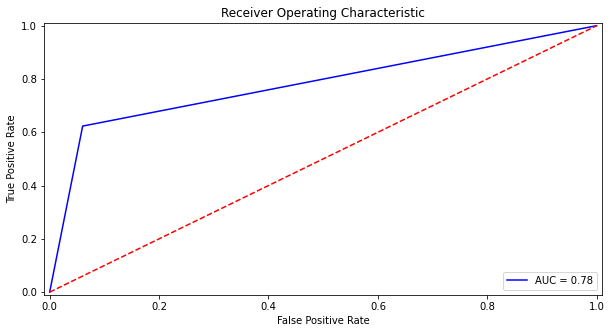

In [38]:
plot_roc_curve(y,y_predict)

In [39]:
dff = pd.read_excel('Dataset.xlsx',sheet_name=2)
dff = dff.drop('y',axis = 1)
dff = dff.replace(to_replace='None', value=np.nan)

# dff.isnull().sum()

In [40]:
X_unlabelled = dff.drop(['instance'],axis = 1)
df3 = X_unlabelled

In [41]:
df3['x1'] = df3['x1'].replace(to_replace=np.nan, value=0)
df3['x4'] = df3['x4'].replace(to_replace=np.nan, value=4)
df3['x8'] = df3['x8'].replace(to_replace=np.nan, value=0)
#df['x1'].apply(lambda x: x.fillna(a, inplace=True))
df3.isnull().sum()

x1     0
x2     0
x3     0
x4     0
x5     0
x6     0
x7     0
x8     0
x9     0
x10    0
x11    0
x12    0
x13    0
x14    0
x15    0
x16    0
x17    0
x18    0
x19    0
x20    0
x21    0
x22    0
dtype: int64

In [42]:
dff1 = model1.predict(df3)
len(dff1)

5000

In [43]:
dx1 = dff["instance"].to_numpy()
dff3 = pd.DataFrame({'Instance':dx1,"y":dff1})
len(dff3)

5000

In [44]:
dff3.to_csv("BMI555IEE520BMI555Report2020HemalChovatiya.csv")

In [45]:
dff3["y"].value_counts()

0    3978
1    1022
Name: y, dtype: int64

In [46]:
dff3

,Instance,y
0,1,0
1,2,0
2,3,1
3,4,0
4,5,0
...,...,...
4995,4996,0
4996,4997,0
4997,4998,0
4998,4999,0
